### Alternus Vera Individual Assignment - 2

- Name: Sudha Amarnath
- Student ID: 013709956
- Team: Spartans

#### Business Problem

The widespread propagation of false information online is not a recent phenomenon but its perceived impact in the 2016 U.S. presidential election has thrust the issue into the spotlight. Technology companies are already exploring machine learning-based approaches for solving the problem. In this project, we are using NLP based text classification to identify the different news categories.

#### Data

Liar Liar Data Set - https://drive.google.com/drive/folders/1IVl4Qt92LZwvMlnJGRcEZVKF-dpawhdz?usp=sharing

#### Description for Fake News Classification Selected

LIAR: A BENCHMARK DATASET FOR FAKE NEWS DETECTION

William Yang Wang, "Liar, Liar Pants on Fire": A New Benchmark Dataset for Fake News Detection, to appear in Proceedings of the 55th Annual Meeting of the Association for Computational Linguistics (ACL 2017), short paper, Vancouver, BC, Canada, July 30-August 4, ACL.

Description of the TSV format:

Column 1: the ID of the statement ([ID].json).
Column 2: the label.
Column 3: the statement.
Column 4: the subject(s).
Column 5: the speaker.
Column 6: the speaker's job title.
Column 7: the state info.
Column 8: the party affiliation.
Column 9-13: the total credit history count, including the current statement.
9: barely true counts.
10: false counts.
11: half true counts.
12: mostly true counts.
13: pants on fire counts.
Column 14: the context (venue / location of the speech or statement).

Note that we do not provide the full-text verdict report in this current version of the dataset,
but you can use the following command to access the full verdict report and links to the source documents:
wget http://www.politifact.com//api/v/2/statement/[ID]/?format=json

1. Social acceptance = # of likes, # of comments (short term utility)
2. Bias Score
3. Spam Score
4. Website credibility/ Domain Ranking
5. Author credibility
6. Political Affliation
7. Occurance Location (Probability of announcing on Radio or Press release being fake is low)
8. Sensationalism/Psychology Utility - agreeing with reader's prior beliefs
9. Frequency Heuristic - Constant repetition makes them believe (Sensationlism)
10. Echo Chamber - Forming groups and spreading opinions
11. Visual - Images, Links, Videos

#### Feature 1 - News Coverage

The main idea is to find the integerity of the liar liar dataset topics against a source which could be the actual media like News Papers. There are high chances for hte positive corelation when the comparision is done with the more reliable source like the News Channels. For this task, I am considering the News Coverage Dataset from Kaggle [ https://www.kaggle.com/alvations/old-newspapers ]. This Old News Dataset from Kaggle, originally comes up from different languages. Since we are intersted only in English, this dataset is preprocessed to select only English News Articles [ https://drive.google.com/open?id=1S_GZ9xkRJ30HR9IYXMccF2UikWX-Zj1R ]. The liar liar dataset topics span over a decade , likely the news are from (2005-2015). Since the old news data setup after preprocessing is similar for the coverage in year wise, there could he high chances of co-relation. We then use this feature to perform Fake and not Fake classification for the Liar Liar Data set.

The assignment explains 3 different approaches to classify text based on the news coverage information. The different approaches are as below
1. CountVectorizer
2. Doc2Vec Model
3. TF-IDF Vectorizer

The Performance of these approaches are evaluated based on the accuracy score using the following algorithms.
1. Multinomial Naive Bayes
2. SVM
3. SGD
4. Random Forest
5. Logistic Regression

#### Data Preprocessing

1. Remove non-letters/Special Characters and Punctuations
2. Convert to lower case
3. Remove punctuation
4. Tokenize
5. Remove stop words
6. Lemmentize
7. Stemming
8. Remove small words of length < 3

#### What didn't work?
As for the News Coverage Assignment in the Sprint One, the Old News data set is way to big having nearly 1M rows of topics. Initially I tried it as the doc2vector train set and the test set being the liar liar data sets. The doc2vector model apporach for the complete train data set was too time consuming. From the initial estimate of parsing the vectors was taking more than 24 hours. 
Another method tried was to find the cosine similarity between the topics in the two files. But this being not so better than the doc2vector approach, ti wasn't considered for the news coverage topic modelling. 

#### What worked later?
Since we are looking for a non biased labels in the test data set, I reduced the size of the Old News to randomly pick 100k news rows. This helped greatly in reducing the overall run time of the project to nearly 90 mintues. The accuracy of the predicted model for the News Coverage feature across all algorithms are nearly 62-69%. 


#### Feature 2 - Sensational Feature Prediction



### Importing libraries

In [264]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse
import sklearn.utils
import string
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
nltk.download('punkt')
nltk.download('wordnet')
pd.set_option('display.max_columns', None)
from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Input data

In [0]:
test_filename = '/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/dataset/test.tsv'
train_filename = '/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/dataset/train.tsv'
valid_filename = '/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/dataset/valid.tsv'
oldnews_filename = '/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/newsdataset/old-newspaper.tsv'

colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']
oldnewscols = ['language', 'source', 'date', 'headline_text']
train_news = pd.read_csv(train_filename, sep='\t', names = colnames, error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = colnames, error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames, error_bad_lines=False)
old_news = pd.read_csv(oldnews_filename, sep='\t', names = oldnewscols, error_bad_lines=False)
old_news = old_news.drop(old_news.index[0])
old_news = sklearn.utils.shuffle(old_news, random_state=100).reset_index(drop=True)

#train_news = train_news.head(2000)
#test_news = test_news.head(200)
#valid_news = valid_news.head(200)
old_news = old_news.head(100000)



#### Info: train_news and test_news

In [266]:
print('train dim:',train_news.shape, 'test dim:', test_news.shape)
train_news.iloc[0:2]

train dim: (10240, 14) test dim: (1267, 14)


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


#### Info: oldnews

In [267]:
print('oldnews dim:',old_news.shape)
old_news.iloc[0:5]

oldnews dim: (100000, 4)


,language,source,date,headline_text
0,English,nj.com,2009/09/01,August vehicle purchases under the clunkers pr...
1,English,nj.com,2011/09/30,"Along with his brothers, bassist Percy (who di..."
2,English,cleveland.com,2011/10/10,The haunting season is almost upon us with Hal...
3,English,oregonlive.com,2011/10/27,"(109 min., PG-13, multiple locations) Grade: B"
4,English,latimes.com,2012/04/27,In a bid to improve care and keep a lid on cos...


### Data cleaning, removing stopwords, lemmatizing, tokenizing

In [0]:
# 5. Convert the stopwords list to "set" data type.
global stops
global stemmer
global wlemmatizer
global tokenizer

stops = set(nltk.corpus.stopwords.words("english"))
stemmer = nltk.stem.SnowballStemmer('english')
wlemmatizer = WordNetLemmatizer()
tokenizer = nltk.word_tokenize

def cleaning(raw_news):
    
    import nltk
    global stops
    global stemmer
    global wlemmatizer
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Remove punctuation
    news = news.translate(str.maketrans('', '', string.punctuation))
        
    # 4. Tokenize.
    news_words = tokenizer(news)
        
    # 5. Remove stop words. 
    words = [w for w in news_words if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [wlemmatizer.lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [stemmer.stem(w) for w in wordnet_lem ]

    # 8. Join the stemmed words back into one string after removing small words
    return ' '.join(word for word in stems if len(word)>2)


### Data cleaning applied for train_news, test_news, valid_news, old_news





In [269]:
import time
t1 = time.time()
train_news['clean'] = train_news["headline_text"].apply(cleaning) 
t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")
train_news.head()


Time to clean, tokenize and stem train data: 
 10240 news: 0.06746803919474284 min


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term


In [270]:
import time
t1 = time.time()
train_news['clean'] = train_news["headline_text"].apply(cleaning) 
t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")


t1 = time.time()
test_news['clean'] = test_news["headline_text"].apply(cleaning)
t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")


t1 = time.time()
valid_news['clean'] = valid_news["headline_text"].apply(cleaning)
t2 = time.time()
print("\n\nTime to clean, tokenize and stem valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")


t1 = time.time()
old_news['clean'] = old_news["headline_text"].apply(cleaning)
t2 = time.time()
print("\n\nTime to clean, tokenize and stem oldnews data: \n", len(old_news), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 10240 news: 0.06724702914555868 min


Time to clean, tokenize and stem test data: 
 1267 news: 0.008634992440541585 min


Time to clean, tokenize and stem valid data: 
 1284 news: 0.008603485425313313 min


Time to clean, tokenize and stem oldnews data: 
 100000 news: 1.0355930089950562 min


### Saving the cleaned files to the local drive 





In [0]:
train_news['cleanlist'] = train_news['clean'].str.split(' ')
test_news['cleanlist'] = test_news['clean'].str.split(' ')
valid_news['cleanlist'] = valid_news['clean'].str.split(' ')
old_news['cleanlist'] = old_news['clean'].str.split(' ')

train_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/train_processed.csv", sep=',')
test_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/test_processed.csv", sep=',')
valid_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/valid_processed.csv", sep=',')
old_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/oldnews_processed.csv", sep=',')

### Visualizing the processed train, test, valid datasets on Word Cloud





In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


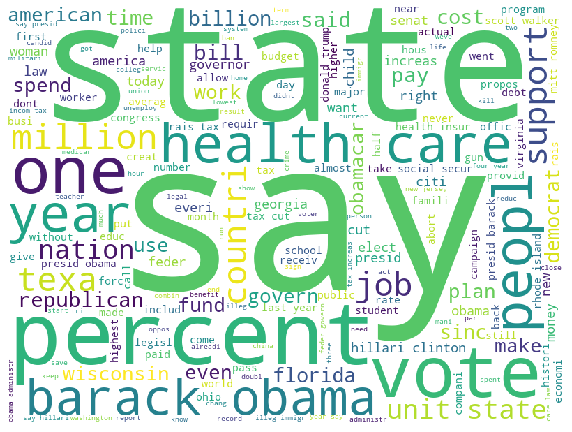

In [273]:
cloud(' '.join(train_news['clean']))

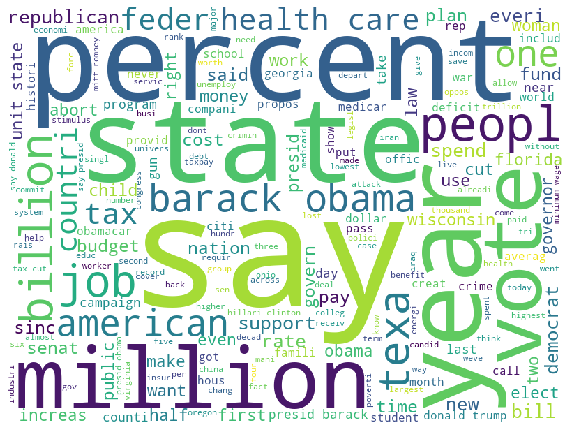

In [274]:
cloud(' '.join(test_news['clean']))

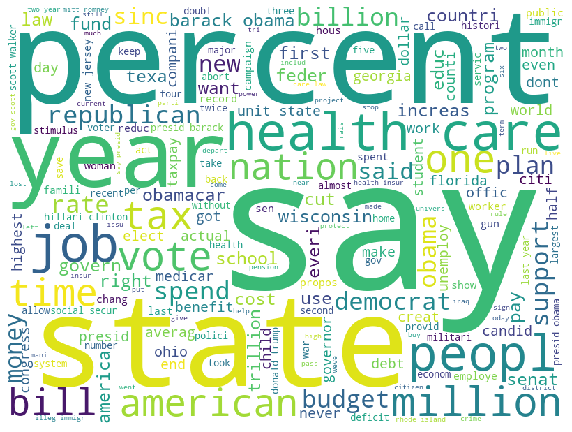

In [275]:
cloud(' '.join(valid_news['clean']))

### Appling LDA model to train, test, valid, and oldnews, tokenized words

In [0]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

def topics(tokenized_words):
    d = Dictionary([tokenized_words])
    c = [d.doc2bow(tokenized_words)]
    m = LdaModel(c, num_topics=1, id2word=d)
    return list(m.print_topics(num_topics=1, num_words=5))
  

### Number of words selected are 5 in each LDA topic. A new column is created 'topics' based on the LDA output

In [277]:
valid_news['topics'] = valid_news['cleanlist'].apply(topics)
display(valid_news.head())
print(valid_news['topics'][1])

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,american work,"[american, work]","[(0, 0.500*""american"" + 0.500*""work"")]"
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bibl instead kuran ...,"[obama, sworn, offic, use, holi, bibl, instead...","[(0, 0.130*""bibl"" + 0.087*""instead"" + 0.087*""s..."
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parad social welfar organ involv pol...,"[say, organ, parad, social, welfar, organ, inv...","[(0, 0.091*""organ"" + 0.061*""say"" + 0.061*""stat..."
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[say, near, half, oregon, child, poor]","[(0, 0.167*""child"" + 0.167*""half"" + 0.167*""nea..."
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[attack, republican, various, program, econom,...","[(0, 0.071*""stimul"" + 0.071*""stuff"" + 0.071*""p..."


[(0, '0.130*"bibl" + 0.087*"instead" + 0.087*"sworn" + 0.087*"offic" + 0.087*"obama"')]


In [0]:
train_news['topics'] = train_news['cleanlist'].apply(topics)
test_news['topics'] = test_news['cleanlist'].apply(topics)
valid_news['topics'] = valid_news['cleanlist'].apply(topics)
old_news['topics'] = old_news['cleanlist'].apply(topics)

### LDA topics with most relavent words with weights

In [279]:
old_news.clean[10],old_news.topics[10]

('john jorgensen work brokerag firm gotten pas governor california cross bay oakland san francisco busi',
 [(0,
   '0.067*"oakland" + 0.067*"pas" + 0.067*"jorgensen" + 0.067*"governor" + 0.067*"san"')])

Adding a function to remove the LDA word weights

In [0]:
def parseTopics(topics):
    output = []
    words = topics[0][1].split( '+' )
    for word in words:
        output.append( word.split('*')[1].replace( '"', '' ) )
    return output

### Applying the parseTopics to create a column having list of top 5 words from the LDA output.

In [0]:
train_news['topicsparsedlist'] = train_news['topics'].apply(parseTopics)
test_news['topicsparsedlist'] = test_news['topics'].apply(parseTopics)
valid_news['topicsparsedlist'] = valid_news['topics'].apply(parseTopics)
old_news['topicsparsedlist'] = old_news['topics'].apply(parseTopics)

train_news['topicsparsed'] = train_news['topicsparsedlist'].apply(' '.join)
test_news['topicsparsed'] = test_news['topicsparsedlist'].apply(' '.join)
valid_news['topicsparsed'] = valid_news['topicsparsedlist'].apply(' '.join)
old_news['topicsparsed'] = old_news['topicsparsedlist'].apply(' '.join)


In [282]:
train_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...,"[say, anni, list, polit, group, support, third...","[(0, 0.100*""say"" + 0.100*""list"" + 0.100*""third...","[say , list , third , support , abort]",say list third support abort
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...,"[declin, coal, start, start, natur, gas, took,...","[(0, 0.167*""start"" + 0.083*""georg"" + 0.083*""ga...","[start , georg , gas , presid , natur]",start georg gas presid natur
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,"[hillari, clinton, agre, john, mccain, vote, g...","[(0, 0.083*""hillari"" + 0.083*""georg"" + 0.083*""...","[hillari , georg , mccain , john , iran]",hillari georg mccain john iran
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,"[health, care, reform, legisl, like, mandat, f...","[(0, 0.100*""mandat"" + 0.100*""legisl"" + 0.100*""...","[mandat , legisl , sex , reform , care]",mandat legisl sex reform care
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[econom, turnaround, start, end, term]","[(0, 0.200*""econom"" + 0.200*""end"" + 0.200*""sta...","[econom , end , start , term , turnaround]",econom end start term turnaround


In [283]:
test_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall mexico border take liter year,"[build, wall, mexico, border, take, liter, year]","[(0, 0.143*""take"" + 0.143*""mexico"" + 0.143*""wa...","[take , mexico , wall , border , liter]",take mexico wall border liter
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[wisconsin, pace, doubl, number, layoff, year]","[(0, 0.167*""doubl"" + 0.167*""layoff"" + 0.167*""n...","[doubl , layoff , number , pace , wisconsin]",doubl layoff number pace wisconsin
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[say, john, mccain, done, noth, help, vet]","[(0, 0.143*""noth"" + 0.143*""mccain"" + 0.143*""sa...","[noth , mccain , say , done , john]",noth mccain say done john
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...,"[suzann, bonamici, support, plan, cut, choic, ...","[(0, 0.111*""plan"" + 0.111*""medicar"" + 0.111*""s...","[plan , medicar , support , senior , advantag]",plan medicar support senior advantag
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether center crimin scheme violat...,"[ask, report, whether, center, crimin, scheme,...","[(0, 0.071*""violat"" + 0.071*""whether"" + 0.071*...","[violat , whether , scheme , walker , nod]",violat whether scheme walker nod


In [284]:
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,american work,"[american, work]","[(0, 0.500*""american"" + 0.500*""work"")]","[american , work]",american work
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bibl instead kuran ...,"[obama, sworn, offic, use, holi, bibl, instead...","[(0, 0.130*""bibl"" + 0.087*""instead"" + 0.087*""s...","[bibl , instead , sworn , offic , obama]",bibl instead sworn offic obama
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parad social welfar organ involv pol...,"[say, organ, parad, social, welfar, organ, inv...","[(0, 0.091*""organ"" + 0.061*""say"" + 0.061*""stat...","[organ , say , statut , prohibit , social]",organ say statut prohibit social
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[say, near, half, oregon, child, poor]","[(0, 0.167*""child"" + 0.167*""half"" + 0.167*""nea...","[child , half , near , oregon , poor]",child half near oregon poor
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[attack, republican, various, program, econom,...","[(0, 0.071*""stimul"" + 0.071*""stuff"" + 0.071*""p...","[stimul , stuff , program , stimulus , percent]",stimul stuff program stimulus percent


In [285]:
old_news.head()

,language,source,date,headline_text,clean,cleanlist,topics,topicsparsedlist,topicsparsed
0,English,nj.com,2009/09/01,August vehicle purchases under the clunkers pr...,august vehicl purchas clunker program may tota...,"[august, vehicl, purchas, clunker, program, ma...","[(0, 0.059*""wrote"" + 0.059*""august"" + 0.059*""p...","[wrote , august , program , total , purchas]",wrote august program total purchas
1,English,nj.com,2011/09/30,"Along with his brothers, bassist Percy (who di...",along brother bassist perci die saxophonist ji...,"[along, brother, bassist, perci, die, saxophon...","[(0, 0.034*""brother"" + 0.022*""perci"" + 0.022*""...","[brother , perci , musician , philli , philade...",brother perci musician philli philadelphia
2,English,cleveland.com,2011/10/10,The haunting season is almost upon us with Hal...,haunt season almost upon halloween around corn...,"[haunt, season, almost, upon, halloween, aroun...","[(0, 0.063*""haunt"" + 0.063*""halloween"" + 0.048...","[haunt , halloween , photo , school , see]",haunt halloween photo school see
3,English,oregonlive.com,2011/10/27,"(109 min., PG-13, multiple locations) Grade: B",min multipl locat grade,"[min, multipl, locat, grade]","[(0, 0.250*""grade"" + 0.250*""locat"" + 0.250*""mi...","[grade , locat , min , multipl]",grade locat min multipl
4,English,latimes.com,2012/04/27,In a bid to improve care and keep a lid on cos...,bid improv care keep lid cost molina among fir...,"[bid, improv, care, keep, lid, cost, molina, a...","[(0, 0.065*""clinic"" + 0.065*""california"" + 0.0...","[clinic , california , plan , molina , state]",clinic california plan molina state


In [286]:
print(test_news.shape)
print(old_news.shape)

(1267, 19)
(100000, 9)


In [287]:
print(test_news['clean'][:5])

0             build wall mexico border take liter year
1              wisconsin pace doubl number layoff year
2                   say john mccain done noth help vet
3    suzann bonamici support plan cut choic medicar...
4    ask report whether center crimin scheme violat...
Name: clean, dtype: object


In [288]:
print(old_news['clean'][:5])
    

0    august vehicl purchas clunker program may tota...
1    along brother bassist perci die saxophonist ji...
2    haunt season almost upon halloween around corn...
3                              min multipl locat grade
4    bid improv care keep lid cost molina among fir...
Name: clean, dtype: object


In [289]:
'''
#method 1 tried - cosine similarity using spacy - too time consuming and not much accurate
import spacy
import warnings
warnings.filterwarnings('ignore')
nlp = spacy.load('en')


limit = 0.90
for trow in test_news['topicsparsed'][:5]:
    tdoc = nlp(" ".join(trow))
    #print(tdoc)
    match = 0
    sval = []
    for orow in old_news['topicsparsed'][:1000]:
        odoc = nlp(" ".join(orow))
        sim = tdoc.similarity(odoc)
        if sim > limit:
            match = match + 1
            sval.append(sim)
    if match > 0:
        print(tdoc,match,sval)
'''


'\n#method 1 tried - cosine similarity using spacy - too time consuming and not much accurate\nimport spacy\nimport warnings\nwarnings.filterwarnings(\'ignore\')\nnlp = spacy.load(\'en\')\n\n\nlimit = 0.90\nfor trow in test_news[\'topicsparsed\'][:5]:\n    tdoc = nlp(" ".join(trow))\n    #print(tdoc)\n    match = 0\n    sval = []\n    for orow in old_news[\'topicsparsed\'][:1000]:\n        odoc = nlp(" ".join(orow))\n        sim = tdoc.similarity(odoc)\n        if sim > limit:\n            match = match + 1\n            sval.append(sim)\n    if match > 0:\n        print(tdoc,match,sval)\n'

### Doc2Vec Approach to compare the topics in the liar liar dataset with the oldnews dataset. Creating a tagged document for the news dataset.

In [0]:
#word modeling
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression

tagged_news = [TaggedDocument(words=word_tokenize(_d.lower()), \
                              tags=[str(i)]) for i, _d in enumerate(old_news['topicsparsed'])]


### Defining Doc2Vec model

In [0]:
doc2vecmodel = Doc2Vec(vector_size=100, # 100 should be fine based on the standards
                window=8, #change to 8
                alpha=.025, #initial learning rate
                min_alpha=0.00025, #learning rate drops linearly to this
                min_count=2, #ignores all words with total frequency lower than this.
                dm =0, #algorith 0=distributed bow, 1=distributed memory
                workers=16,#cores to use
                epochs=2)

#build the vocab on the training data
doc2vecmodel.build_vocab(tagged_news)

### Training Doc2Vec model for oldnews dataset.

In [292]:
doc2vecmodel.train(tagged_news, total_examples=doc2vecmodel.corpus_count, epochs=doc2vecmodel.epochs)
doc2vecmodel.save("oldnewsdoc2vec.model")
print("Model Saved")


Model Saved


### Doc2Vec infer vector on one of the liar lair dataset row or topic.

In [293]:
#doc_id = random.randint(0, len(test_corpus) - 1)
doc_id = 0
inferred_vector = doc2vecmodel.infer_vector(test_news['topicsparsedlist'][doc_id])
sims = doc2vecmodel.docvecs.most_similar([inferred_vector], topn=len(doc2vecmodel.docvecs))
#Most similar doc_id and its ranking
print(sims[0][0], sims[0][1])
print(sims[1][0], sims[1][1])

97139 0.4176235496997833
77603 0.4027010202407837


### Selecting the words with range from the following Doc2Vec inferred similarity list of 100k elements for each test document.
1. Top documentID and value
2. Second in the list
3. Next in the list
4. 1000th in the list(top 1%)
5. 25000th in the list(top 25%)
6. 50000th in the list(top 50%)
7. 75000th in the list(top 75%)
8. Last in the list 

In [294]:
oldnewslen = old_news['topicsparsedlist'].count()
top1 = oldnewslen//100
top25 = oldnewslen//4
top50 = oldnewslen//2
top75 = 3 * oldnewslen//4

print(oldnewslen)
def getDoc2VectorValues(doc_list):
    values = []
    inferred_vector = doc2vecmodel.infer_vector(doc_list)
    sims = doc2vecmodel.docvecs.most_similar([inferred_vector], topn=len(doc2vecmodel.docvecs))
    return [sims[0], sims[1], sims[2], sims[top1], sims[top25], sims[top50], sims[top75], sims[oldnewslen-1]]


100000


### Printing the matching values for the test news liar liar data set for first 10 topics. The output shown below is the the list sorted in the ranking order inferred from the doc2vec trained model.

In [295]:
for i in range(10):
    print(getDoc2VectorValues(test_news['topicsparsedlist'][i]))

[('97139', 0.41547971963882446), ('77603', 0.40131980180740356), ('67012', 0.39445215463638306), ('74842', 0.23170652985572815), ('39318', 0.06816858798265457), ('29508', 0.0004992708563804626), ('41539', -0.06750021874904633), ('32686', -0.41595086455345154)]
[('67909', 0.4298973083496094), ('85721', 0.39124637842178345), ('16990', 0.3652319312095642), ('81990', 0.23158815503120422), ('82978', 0.06699678301811218), ('24450', -0.0010213889181613922), ('93872', -0.06888292729854584), ('41891', -0.41451337933540344)]
[('95674', 0.406106173992157), ('62166', 0.4058981239795685), ('98655', 0.40008270740509033), ('15222', 0.23143140971660614), ('6892', 0.06832792609930038), ('47902', 0.00029363296926021576), ('24882', -0.06691576540470123), ('75204', -0.4109013080596924)]
[('6111', 0.456093966960907), ('6307', 0.426133930683136), ('11217', 0.3993901014328003), ('63347', 0.23086997866630554), ('95462', 0.06653175503015518), ('23408', -0.0008252114057540894), ('80095', -0.06871169805526733), 

In [296]:
test_news['doc2vector_values'] = ''
train_news['doc2vector_values'] = ''
valid_news['doc2vector_values'] = ''
test_news['doc2vector_values'] = test_news['doc2vector_values'].astype(object)
train_news['doc2vector_values'] = train_news['doc2vector_values'].astype(object)
valid_news['doc2vector_values'] = valid_news['doc2vector_values'].astype(object)

#test_news = test_news.drop(columns=['doc2vector_values'])
#train_news = test_news.drop(columns=['doc2vector_values'])
#valid_news = test_news.drop(columns=['doc2vector_values'])
test_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed,doc2vector_values
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall mexico border take liter year,"[build, wall, mexico, border, take, liter, year]","[(0, 0.143*""take"" + 0.143*""mexico"" + 0.143*""wa...","[take , mexico , wall , border , liter]",take mexico wall border liter,
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[wisconsin, pace, doubl, number, layoff, year]","[(0, 0.167*""doubl"" + 0.167*""layoff"" + 0.167*""n...","[doubl , layoff , number , pace , wisconsin]",doubl layoff number pace wisconsin,
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[say, john, mccain, done, noth, help, vet]","[(0, 0.143*""noth"" + 0.143*""mccain"" + 0.143*""sa...","[noth , mccain , say , done , john]",noth mccain say done john,
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...,"[suzann, bonamici, support, plan, cut, choic, ...","[(0, 0.111*""plan"" + 0.111*""medicar"" + 0.111*""s...","[plan , medicar , support , senior , advantag]",plan medicar support senior advantag,
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether center crimin scheme violat...,"[ask, report, whether, center, crimin, scheme,...","[(0, 0.071*""violat"" + 0.071*""whether"" + 0.071*...","[violat , whether , scheme , walker , nod]",violat whether scheme walker nod,


In [0]:
# remove this later
###aaaa

### Creating doc2vector_values for test_news data set - 1267 rows - runtime ~6 mins

In [298]:
t1 = time.time()
for doc_id in range(test_news['topicsparsedlist'].count()):
    test_news.at[doc_id, 'doc2vector_values'] = getDoc2VectorValues(test_news['topicsparsedlist'][doc_id])
    if doc_id % 100 == 0: t2 = time.time(); print('doc_id :', doc_id, 'timestamp:', t2)
print("\n\nTime to map doc2vector data to test news: \n", len(test_news), "news:", (t2-t1)/60, "min")


doc_id : 0 timestamp: 1575092182.1910384
doc_id : 100 timestamp: 1575092216.9541261
doc_id : 200 timestamp: 1575092251.5070398
doc_id : 300 timestamp: 1575092286.1944435
doc_id : 400 timestamp: 1575092320.710495
doc_id : 500 timestamp: 1575092355.34957
doc_id : 600 timestamp: 1575092390.0700562
doc_id : 700 timestamp: 1575092424.8779395
doc_id : 800 timestamp: 1575092459.7154827
doc_id : 900 timestamp: 1575092494.452177
doc_id : 1000 timestamp: 1575092529.1742055
doc_id : 1100 timestamp: 1575092563.8996577
doc_id : 1200 timestamp: 1575092598.4976196


Time to map doc2vector data to test news: 
 1267 news: 6.944345049063364 min


In [299]:
#print(test_news[test_news['doc2vector_simlarity'] > 0.42 ].count())
test_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed,doc2vector_values
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall mexico border take liter year,"[build, wall, mexico, border, take, liter, year]","[(0, 0.143*""take"" + 0.143*""mexico"" + 0.143*""wa...","[take , mexico , wall , border , liter]",take mexico wall border liter,"[(97139, 0.41699445247650146), (77603, 0.40401..."
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[wisconsin, pace, doubl, number, layoff, year]","[(0, 0.167*""doubl"" + 0.167*""layoff"" + 0.167*""n...","[doubl , layoff , number , pace , wisconsin]",doubl layoff number pace wisconsin,"[(67909, 0.4299817979335785), (85721, 0.390455..."
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[say, john, mccain, done, noth, help, vet]","[(0, 0.143*""noth"" + 0.143*""mccain"" + 0.143*""sa...","[noth , mccain , say , done , john]",noth mccain say done john,"[(62166, 0.4074826240539551), (95674, 0.402979..."
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...,"[suzann, bonamici, support, plan, cut, choic, ...","[(0, 0.111*""plan"" + 0.111*""medicar"" + 0.111*""s...","[plan , medicar , support , senior , advantag]",plan medicar support senior advantag,"[(6111, 0.4579394459724426), (6307, 0.42464876..."
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether center crimin scheme violat...,"[ask, report, whether, center, crimin, scheme,...","[(0, 0.071*""violat"" + 0.071*""whether"" + 0.071*...","[violat , whether , scheme , walker , nod]",violat whether scheme walker nod,"[(21422, 0.4590405821800232), (58510, 0.425023..."


### Creating doc2vector_values for train_news data set - 10240 rows - runtime ~60 mins

In [300]:
t1 = time.time()
for doc_id in range(train_news['topicsparsedlist'].count()):
    train_news.at[doc_id, 'doc2vector_values'] = getDoc2VectorValues(train_news['topicsparsedlist'][doc_id])
    if doc_id % 1000 == 0: t2 = time.time(); print('doc_id :', doc_id, 'timestamp:', t2)
print("\n\nTime to map doc2vector data to train news: \n", len(train_news), "news:", (t2-t1)/60, "min")

doc_id : 0 timestamp: 1575092621.8129492
doc_id : 1000 timestamp: 1575092963.1779194
doc_id : 2000 timestamp: 1575093302.884278
doc_id : 3000 timestamp: 1575093640.8033733
doc_id : 4000 timestamp: 1575093979.352597
doc_id : 5000 timestamp: 1575094321.5610044
doc_id : 6000 timestamp: 1575094665.910151
doc_id : 7000 timestamp: 1575095011.135449
doc_id : 8000 timestamp: 1575095359.9577858
doc_id : 9000 timestamp: 1575095707.7068071
doc_id : 10000 timestamp: 1575096055.9462242


Time to map doc2vector data to train news: 
 10240 news: 57.24135661522548 min


### Creating doc2vector_values for valid_news data set - 1284 rows - runtime ~6 mins

In [301]:
t1 = time.time()
for doc_id in range(valid_news['topicsparsedlist'].count()):
    valid_news.at[doc_id, 'doc2vector_values'] = getDoc2VectorValues(valid_news['topicsparsedlist'][doc_id])
    if doc_id % 100 == 0: t2 = time.time(); print('doc_id :', doc_id, ', timestamp:', t2)
print("\n\nTime to map doc2vector data to valid news: \n", len(valid_news), "news:", (t2-t1)/60, "min")


doc_id : 0 , timestamp: 1575096139.0157032
doc_id : 100 , timestamp: 1575096173.7077627
doc_id : 200 , timestamp: 1575096208.2353299
doc_id : 300 , timestamp: 1575096242.9770422
doc_id : 400 , timestamp: 1575096277.7083848
doc_id : 500 , timestamp: 1575096312.4371781
doc_id : 600 , timestamp: 1575096347.1246176
doc_id : 700 , timestamp: 1575096381.7112594
doc_id : 800 , timestamp: 1575096416.1944542
doc_id : 900 , timestamp: 1575096450.9550874
doc_id : 1000 , timestamp: 1575096485.71133
doc_id : 1100 , timestamp: 1575096520.3079593
doc_id : 1200 , timestamp: 1575096554.877822


Time to map doc2vector data to valid news: 
 1284 news: 6.936936291058858 min


In [0]:
#train_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/train_processed_d2v.csv", sep=',')
#test_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/test_processed_d2v.csv", sep=',')
#valid_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/valid_processed_d2v.csv", sep=',')
#train_news = pd.read_csv('/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/train_processed_d2v.csv', sep=',')
#test_news = pd.read_csv('/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/test_processed_d2v.csv', sep=',')
#valid_news = pd.read_csv('/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/valid_processed_d2v.csv', sep=',')

### Displaying the three liar liar data sets with doc2vector_values

In [303]:
display(train_news.head())
display(test_news.head())
display(valid_news.head())

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed,doc2vector_values
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...,"[say, anni, list, polit, group, support, third...","[(0, 0.100*""say"" + 0.100*""list"" + 0.100*""third...","[say , list , third , support , abort]",say list third support abort,"[(52370, 0.4188210368156433), (45657, 0.397479..."
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...,"[declin, coal, start, start, natur, gas, took,...","[(0, 0.167*""start"" + 0.083*""georg"" + 0.083*""ga...","[start , georg , gas , presid , natur]",start georg gas presid natur,"[(45597, 0.3916231393814087), (70428, 0.377940..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,"[hillari, clinton, agre, john, mccain, vote, g...","[(0, 0.083*""hillari"" + 0.083*""georg"" + 0.083*""...","[hillari , georg , mccain , john , iran]",hillari georg mccain john iran,"[(72028, 0.41241946816444397), (69129, 0.40384..."
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,"[health, care, reform, legisl, like, mandat, f...","[(0, 0.100*""mandat"" + 0.100*""legisl"" + 0.100*""...","[mandat , legisl , sex , reform , care]",mandat legisl sex reform care,"[(23734, 0.4179561138153076), (13708, 0.388687..."
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[econom, turnaround, start, end, term]","[(0, 0.200*""econom"" + 0.200*""end"" + 0.200*""sta...","[econom , end , start , term , turnaround]",econom end start term turnaround,"[(44344, 0.4264419674873352), (61061, 0.407299..."


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed,doc2vector_values
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall mexico border take liter year,"[build, wall, mexico, border, take, liter, year]","[(0, 0.143*""take"" + 0.143*""mexico"" + 0.143*""wa...","[take , mexico , wall , border , liter]",take mexico wall border liter,"[(97139, 0.41699445247650146), (77603, 0.40401..."
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[wisconsin, pace, doubl, number, layoff, year]","[(0, 0.167*""doubl"" + 0.167*""layoff"" + 0.167*""n...","[doubl , layoff , number , pace , wisconsin]",doubl layoff number pace wisconsin,"[(67909, 0.4299817979335785), (85721, 0.390455..."
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[say, john, mccain, done, noth, help, vet]","[(0, 0.143*""noth"" + 0.143*""mccain"" + 0.143*""sa...","[noth , mccain , say , done , john]",noth mccain say done john,"[(62166, 0.4074826240539551), (95674, 0.402979..."
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...,"[suzann, bonamici, support, plan, cut, choic, ...","[(0, 0.111*""plan"" + 0.111*""medicar"" + 0.111*""s...","[plan , medicar , support , senior , advantag]",plan medicar support senior advantag,"[(6111, 0.4579394459724426), (6307, 0.42464876..."
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether center crimin scheme violat...,"[ask, report, whether, center, crimin, scheme,...","[(0, 0.071*""violat"" + 0.071*""whether"" + 0.071*...","[violat , whether , scheme , walker , nod]",violat whether scheme walker nod,"[(21422, 0.4590405821800232), (58510, 0.425023..."


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed,doc2vector_values
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,american work,"[american, work]","[(0, 0.500*""american"" + 0.500*""work"")]","[american , work]",american work,"[(7043, 0.4137519299983978), (80708, 0.4057136..."
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bibl instead kuran ...,"[obama, sworn, offic, use, holi, bibl, instead...","[(0, 0.130*""bibl"" + 0.087*""instead"" + 0.087*""s...","[bibl , instead , sworn , offic , obama]",bibl instead sworn offic obama,"[(7138, 0.49534961581230164), (58151, 0.429439..."
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parad social welfar organ involv pol...,"[say, organ, parad, social, welfar, organ, inv...","[(0, 0.091*""organ"" + 0.061*""say"" + 0.061*""stat...","[organ , say , statut , prohibit , social]",organ say statut prohibit social,"[(43982, 0.4415914714336395), (7766, 0.3919083..."
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[say, near, half, oregon, child, poor]","[(0, 0.167*""child"" + 0.167*""half"" + 0.167*""nea...","[child , half , near , oregon , poor]",child half near oregon poor,"[(54251, 0.4173888564109802), (24218, 0.403545..."
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[attack, republican, various, program, econom,...","[(0, 0.071*""stimul"" + 0.071*""stuff"" + 0.071*""p...","[stimul , stuff , program , stimulus , percent]",stimul stuff program stimulus percent,"[(65673, 0.4787946343421936), (9606, 0.4361578..."


In [304]:
# [sims[0], sims[1], sims[2], sims[top1], sims[top25], sims[top50], sims[top75], sims[oldnewslen-1]]
doc2veccols = ['topdoc0', 'doc2vec0', 'doc2vec1', 'doc2vec2', 'doc2vectop1', 'doc2vectop25', 'doc2vectop50', 'doc2vectop75', 'doc2veclast']
sudf = test_news.copy()
sudf.dtypes

jsonid               object
label                object
headline_text        object
subject              object
speaker              object
speakerjobtitle      object
stateinfo            object
partyaffiliation     object
barelytruecounts      int64
falsecounts           int64
halftruecounts        int64
mostlytrueocunts      int64
pantsonfirecounts     int64
context              object
clean                object
cleanlist            object
topics               object
topicsparsedlist     object
topicsparsed         object
doc2vector_values    object
dtype: object

### Function to split the doc 2 vector inferred data to create more columns

In [0]:
def splitd2vectordata(DF):
    
    doc2veccols = ['topdoc0', 'doc2vec0', 'doc2vec1', 'doc2vec2', 'doc2vectop1', 'doc2vectop25', 'doc2vectop50', \
                   'doc2vectop75', 'doc2veclast', 'midabovezero', 'score0minus1', 'score1minus2', 'score0minus2', \
                   'score0minustop1']

    for i in range(DF['doc2vector_values'].count()):
        #d2vlist = list(eval(DF['doc2vector_values'][i]))
        d2vlist = DF['doc2vector_values'][i]
        #print(d2vlisvalt)
        #print(doc2veccols[1])
        #print(len(d2vlist))
        DF.at[i, doc2veccols[0]] = d2vlist[0][0]
        DF.at[i, doc2veccols[1]] = d2vlist[0][1]
        DF.at[i, doc2veccols[2]] = d2vlist[1][1]
        DF.at[i, doc2veccols[3]] = d2vlist[2][1]
        DF.at[i, doc2veccols[4]] = d2vlist[3][1]
        DF.at[i, doc2veccols[5]] = d2vlist[4][1]
        DF.at[i, doc2veccols[6]] = d2vlist[5][1]
        DF.at[i, doc2veccols[7]] = d2vlist[6][1]
        DF.at[i, doc2veccols[8]] = d2vlist[7][1]
        if d2vlist[5][1] >= 0:
            DF.at[i, doc2veccols[9]] = 1
        else:
            DF.at[i, doc2veccols[9]] = 0
        DF.at[i, doc2veccols[10]] = d2vlist[0][1] - d2vlist[1][1]
        DF.at[i, doc2veccols[11]] = d2vlist[1][1] - d2vlist[2][1]
        DF.at[i, doc2veccols[12]] = d2vlist[0][1] - d2vlist[2][1]
        DF.at[i, doc2veccols[13]] = d2vlist[0][1] - d2vlist[3][1]


In [0]:
splitd2vectordata(sudf)

In [307]:
sudf.describe()

,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,doc2vec0,doc2vec1,doc2vec2,doc2vectop1,doc2vectop25,doc2vectop50,doc2vectop75,doc2veclast,midabovezero,score0minus1,score1minus2,score0minus2,score0minustop1
count,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000
mean,11.770324,13.465667,17.566693,16.912391,6.016575,0.423901,0.404689,0.394086,0.231624,0.067837,0.000061,-0.067715,-0.424255,0.539858,0.019212,0.010603,0.029815,0.192278
std,18.980496,23.956307,36.109290,36.499879,15.059981,0.024346,0.016089,0.012751,0.001338,0.000848,0.000824,0.000845,0.024303,0.498606,0.018169,0.010240,0.020825,0.024300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.372403,0.363773,0.362215,0.227376,0.064737,-0.003016,-0.070410,-0.536199,0.000000,0.000020,0.000001,0.000143,0.140516
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.406243,0.393264,0.385391,0.230712,0.067280,-0.000478,-0.068271,-0.438019,0.000000,0.005797,0.003298,0.014973,0.174967
50%,3.000000,3.000000,3.000000,3.000000,1.000000,0.419982,0.402825,0.393267,0.231662,0.067844,0.000076,-0.067692,-0.420787,1.000000,0.013863,0.007698,0.025154,0.188369
75%,12.000000,17.000000,15.000000,14.000000,6.000000,0.436988,0.413695,0.401863,0.232518,0.068437,0.000640,-0.067136,-0.407930,1.000000,0.026994,0.014737,0.039870,0.205622
max,70.000000,114.000000,160.000000,163.000000,105.000000,0.542883,0.475137,0.454395,0.236019,0.070574,0.002407,-0.065182,-0.364078,1.000000,0.114774,0.072090,0.142469,0.310873


### Parsing the doc2vector values using split function created above

In [0]:

splitd2vectordata(test_news)
splitd2vectordata(train_news)
splitd2vectordata(valid_news)


### Printing the data set which shows newly amalgamated columns

In [309]:
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed,doc2vector_values,topdoc0,doc2vec0,doc2vec1,doc2vec2,doc2vectop1,doc2vectop25,doc2vectop50,doc2vectop75,doc2veclast,midabovezero,score0minus1,score1minus2,score0minus2,score0minustop1
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,american work,"[american, work]","[(0, 0.500*""american"" + 0.500*""work"")]","[american , work]",american work,"[(7043, 0.4137519299983978), (80708, 0.4057136...",7043,0.413752,0.405714,0.391833,0.234381,0.069824,0.001639,-0.065803,-0.410657,1.0,0.008038,0.013880,0.021919,0.179371
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bibl instead kuran ...,"[obama, sworn, offic, use, holi, bibl, instead...","[(0, 0.130*""bibl"" + 0.087*""instead"" + 0.087*""s...","[bibl , instead , sworn , offic , obama]",bibl instead sworn offic obama,"[(7138, 0.49534961581230164), (58151, 0.429439...",7138,0.495350,0.429439,0.403576,0.231124,0.068170,0.000193,-0.066737,-0.451291,1.0,0.065911,0.025863,0.091774,0.264226
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parad social welfar organ involv pol...,"[say, organ, parad, social, welfar, organ, inv...","[(0, 0.091*""organ"" + 0.061*""say"" + 0.061*""stat...","[organ , say , statut , prohibit , social]",organ say statut prohibit social,"[(43982, 0.4415914714336395), (7766, 0.3919083...",43982,0.441591,0.391908,0.388113,0.231213,0.067138,-0.000030,-0.067774,-0.411017,0.0,0.049683,0.003796,0.053479,0.210378
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[say, near, half, oregon, child, poor]","[(0, 0.167*""child"" + 0.167*""half"" + 0.167*""nea...","[child , half , near , oregon , poor]",child half near oregon poor,"[(54251, 0.4173888564109802), (24218, 0.403545...",54251,0.417389,0.403545,0.402917,0.231487,0.066116,-0.001301,-0.068450,-0.463471,0.0,0.013843,0.000629,0.014472,0.185902
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[attack, republican, various, program, econom,...","[(0, 0.071*""stimul"" + 0.071*""stuff"" + 0.071*""p...","[stimul , stuff , program , stimulus , percent]",stimul stuff program stimulus percent,"[(65673, 0.4787946343421936), (9606, 0.4361578...",65673,0.478795,0.436158,0.374611,0.232062,0.067963,0.000574,-0.067933,-0.406005,1.0,0.042637,0.061547,0.104184,0.246733


### Using test_news.describe() to veiw the stats for the new columns

In [310]:
desc = test_news.describe().copy()
desc.head(10)

,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,doc2vec0,doc2vec1,doc2vec2,doc2vectop1,doc2vectop25,doc2vectop50,doc2vectop75,doc2veclast,midabovezero,score0minus1,score1minus2,score0minus2,score0minustop1
count,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000
mean,11.770324,13.465667,17.566693,16.912391,6.016575,0.423901,0.404689,0.394086,0.231624,0.067837,0.000061,-0.067715,-0.424255,0.539858,0.019212,0.010603,0.029815,0.192278
std,18.980496,23.956307,36.109290,36.499879,15.059981,0.024346,0.016089,0.012751,0.001338,0.000848,0.000824,0.000845,0.024303,0.498606,0.018169,0.010240,0.020825,0.024300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.372403,0.363773,0.362215,0.227376,0.064737,-0.003016,-0.070410,-0.536199,0.000000,0.000020,0.000001,0.000143,0.140516
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.406243,0.393264,0.385391,0.230712,0.067280,-0.000478,-0.068271,-0.438019,0.000000,0.005797,0.003298,0.014973,0.174967
50%,3.000000,3.000000,3.000000,3.000000,1.000000,0.419982,0.402825,0.393267,0.231662,0.067844,0.000076,-0.067692,-0.420787,1.000000,0.013863,0.007698,0.025154,0.188369
75%,12.000000,17.000000,15.000000,14.000000,6.000000,0.436988,0.413695,0.401863,0.232518,0.068437,0.000640,-0.067136,-0.407930,1.000000,0.026994,0.014737,0.039870,0.205622
max,70.000000,114.000000,160.000000,163.000000,105.000000,0.542883,0.475137,0.454395,0.236019,0.070574,0.002407,-0.065182,-0.364078,1.000000,0.114774,0.072090,0.142469,0.310873


### Apply a new column with label values 0 or 1 based on the similarity function
Here each the label is 1 when vaue in doc2vec0, doc2vec1, doc2vec2 values are above the 50% values of the respective column

In [0]:
def similarity_score(DF):
    desc = DF.describe().copy()
    for i in range(DF['doc2vec0'].count()):
        if DF['doc2vec0'][i] >= desc['doc2vec0']['50%'] and DF['doc2vec1'][i] >= desc['doc2vec1']['50%'] and DF['doc2vec2'][i] >= desc['doc2vec2']['50%']:
            DF.at[i, 'doc2vecsimilarity'] = 1
        else:
            DF.at[i, 'doc2vecsimilarity'] = 0

### Apply for all the three data sets

In [0]:
similarity_score(test_news)
similarity_score(train_news)
similarity_score(valid_news)

### Displaying doc2vecsimilarity label for test_news

In [313]:
display(test_news.head(100))

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed,doc2vector_values,topdoc0,doc2vec0,doc2vec1,doc2vec2,doc2vectop1,doc2vectop25,doc2vectop50,doc2vectop75,doc2veclast,midabovezero,score0minus1,score1minus2,score0minus2,score0minustop1,doc2vecsimilarity
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall mexico border take liter year,"[build, wall, mexico, border, take, liter, year]","[(0, 0.143*""take"" + 0.143*""mexico"" + 0.143*""wa...","[take , mexico , wall , border , liter]",take mexico wall border liter,"[(97139, 0.41699445247650146), (77603, 0.40401...",97139,0.416994,0.404015,0.392761,0.231940,0.068261,0.000473,-0.067550,-0.415066,1.0,0.012979,0.011254,0.024233,0.185055,0.0
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[wisconsin, pace, doubl, number, layoff, year]","[(0, 0.167*""doubl"" + 0.167*""layoff"" + 0.167*""n...","[doubl , layoff , number , pace , wisconsin]",doubl layoff number pace wisconsin,"[(67909, 0.4299817979335785), (85721, 0.390455...",67909,0.429982,0.390456,0.365837,0.231698,0.066995,-0.001005,-0.068888,-0.414437,0.0,0.039526,0.024618,0.064144,0.198284,0.0
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[say, john, mccain, done, noth, help, vet]","[(0, 0.143*""noth"" + 0.143*""mccain"" + 0.143*""sa...","[noth , mccain , say , done , john]",noth mccain say done john,"[(62166, 0.4074826240539551), (95674, 0.402979...",62166,0.407483,0.402979,0.399473,0.231466,0.068390,0.000307,-0.066897,-0.411483,1.0,0.004503,0.003506,0.008010,0.176017,0.0
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...,"[suzann, bonamici, support, plan, cut, choic, ...","[(0, 0.111*""plan"" + 0.111*""medicar"" + 0.111*""s...","[plan , medicar , support , senior , advantag]",plan medicar support senior advantag,"[(6111, 0.4579394459724426), (6307, 0.42464876...",6111,0.457939,0.424649,0.399980,0.230706,0.066614,-0.000843,-0.068622,-0.422446,0.0,0.033291,0.024669,0.057960,0.227233,1.0
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether center crimin scheme violat...,"[ask, report, whether, center, crimin, scheme,...","[(0, 0.071*""violat"" + 0.071*""whether"" + 0.071*...","[violat , whether , scheme , walker , nod]",violat whether scheme walker nod,"[(21422, 0.4590405821800232), (58510, 0.425023...",21422,0.459041,0.425023,0.406902,0.232205,0.068639,0.000963,-0.067048,-0.432490,1.0,0.034017,0.018121,0.052139,0.226835,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3706.json,pants-fire,Says people in Africa literally walk two and t...,elections,mike-bennett,State Senator,Florida,republican,0,0,0,0,1,comments made on the Senate floor.,say peopl africa liter walk two three hundr mi...,"[say, peopl, africa, liter, walk, two, three, ...","[(0, 0.091*""say"" + 0.091*""peopl"" + 0.091*""vote...","[say , peopl , vote , two , three]",say peopl vote two three,"[(84142, 0.4374226927757263), (16498, 0.413085...",84142,0.437423,0.413085,0.412188,0.230938,0.067094,-0.000298,-0.06843

### Encoding the labels for 'original','true','mostly-true','half-true','barely-true','false','pants-fire'

In [0]:
#label encoding
true_labels = ['original','true','mostly-true','half-true']
false_labels = ['barely-true','false','pants-fire']

def encode_news_type(input_label):
    if input_label in true_labels:
        return 1
    else:
        return 0

In [0]:
test_news['encoded_label'] = test_news.apply(lambda row: encode_news_type(row['label']), axis=1)
train_news['encoded_label'] = train_news.apply(lambda row: encode_news_type(row['label']), axis=1)
valid_news['encoded_label'] = valid_news.apply(lambda row: encode_news_type(row['label']), axis=1)

In [316]:
for col in ['midabovezero', 'doc2vecsimilarity']:
    test_news[col] = test_news[col].astype(int)
    train_news[col] = train_news[col].astype(int)
    valid_news[col] = valid_news[col].astype(int)
train_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed,doc2vector_values,topdoc0,doc2vec0,doc2vec1,doc2vec2,doc2vectop1,doc2vectop25,doc2vectop50,doc2vectop75,doc2veclast,midabovezero,score0minus1,score1minus2,score0minus2,score0minustop1,doc2vecsimilarity,encoded_label
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...,"[say, anni, list, polit, group, support, third...","[(0, 0.100*""say"" + 0.100*""list"" + 0.100*""third...","[say , list , third , support , abort]",say list third support abort,"[(52370, 0.4188210368156433), (45657, 0.397479...",52370,0.418821,0.397480,0.391816,0.230080,0.068292,0.000566,-0.067423,-0.457037,1,0.021342,0.005664,0.027005,0.188741,0,0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...,"[declin, coal, start, start, natur, gas, took,...","[(0, 0.167*""start"" + 0.083*""georg"" + 0.083*""ga...","[start , georg , gas , presid , natur]",start georg gas presid natur,"[(45597, 0.3916231393814087), (70428, 0.377940...",45597,0.391623,0.377941,0.376659,0.227463,0.065558,-0.002322,-0.070014,-0.470872,0,0.013682,0.001282,0.014964,0.164160,0,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,"[hillari, clinton, agre, john, mccain, vote, g...","[(0, 0.083*""hillari"" + 0.083*""georg"" + 0.083*""...","[hillari , georg , mccain , john , iran]",hillari georg mccain john iran,"[(72028, 0.41241946816444397), (69129, 0.40384...",72028,0.412419,0.403845,0.390639,0.232733,0.067107,-0.000325,-0.067631,-0.399030,0,0.008574,0.013207,0.021781,0.179687,0,1
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,"[health, care, reform, legisl, like, mandat, f...","[(0, 0.100*""mandat"" + 0.100*""legisl"" + 0.100*""...","[mandat , legisl , sex , reform , care]",mandat legisl sex reform care,"[(23734, 0.4179561138153076), (13708, 0.388687...",23734,0.417956,0.388687,0.385093,0.231227,0.067698,-0.000322,-0.068272,-0.408390,0,0.029269,0.003594,0.032863,0.186729,0,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[econom, turnaround, start, end, term]","[(0, 0.200*""econom"" + 0.200*""end"" + 0.200*""sta...","[econom , end , start , term , turnaround]",econom end start term turnaround,"[(44344, 0.4264419674873352), (61061, 0.407299...",44344,0.426442,0.407299,0.406985,0.230309,0.068166,0.000543,-0.067348,-0.425228,1,0.019143,0.000315,0.019457,0.196133,1,1


### Saving the processed data frames in the csv files

In [0]:
train_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/train_processed_d2v.csv", sep=',')
test_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/test_processed_d2v.csv", sep=',')
valid_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/valid_processed_d2v.csv", sep=',')

### Measuring Performance using Classification Models and Algorithms

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")

In [0]:
global accscore
scoredf = pd.DataFrame(columns=['Classification Model', 'Naive Bayes', 'SVM', 'SGD', 'Logistic Regression', 'Random Forest']) 
scoredf.at[0, 'Classification Model'] = 'CountVectorizer'
scoredf.at[1, 'Classification Model'] = 'TFIDF'
scoredf.at[2, 'Classification Model'] = 'Doc2Vector'

def calculate_score(y_test, y_pred):
    global accscore
    scores = []
    confusion = np.array([[0,0],[0,0]])
    score(y_test, y_pred, average='macro')
    precision, recall, fscore, support = score(y_test, y_pred)
    
    accscore = accuracy_score(y_test,y_pred)*100
    print('accuracy: {}'.format(accscore))
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
        
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

### CountVectorizer with Mutinomial Naive Bayes

accuracy: 70.48145224940805
precision: [0.70856685 0.44444444]
recall: [0.98882682 0.02150538]
fscore: [0.8255597  0.04102564]
support: [895 372]


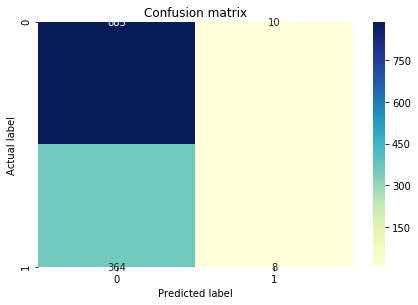

In [320]:
vectorizer = CountVectorizer(ngram_range=(1, 5))
nb_pipeline = Pipeline([
        ('vector', vectorizer),
        ('mname',MultinomialNB())
        ])

nb_pipeline.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_nb = nb_pipeline.predict(test_news['clean'])
np.mean(predicted_nb == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_nb)
scoredf.at[0, 'Naive Bayes'] = accscore

### CountVectorizer with Logistic Regression

accuracy: 69.6921862667719
precision: [0.71133168 0.39655172]
recall: [0.96089385 0.06182796]
fscore: [0.81749049 0.10697674]
support: [895 372]


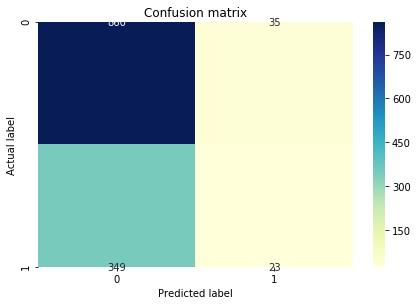

In [321]:
logR_pipeline = Pipeline([
        ('vector', vectorizer),
        ('mname',LogisticRegression())
        ])

logR_pipeline.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_LogR = logR_pipeline.predict(test_news['clean'])
np.mean(predicted_LogR == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_LogR)
scoredf.at[0, 'Logistic Regression'] = accscore

### CountVectorizer with Linear SVC

accuracy: 65.82478295185477
precision: [0.70773381 0.30322581]
recall: [0.87932961 0.12634409]
fscore: [0.78425511 0.17836812]
support: [895 372]


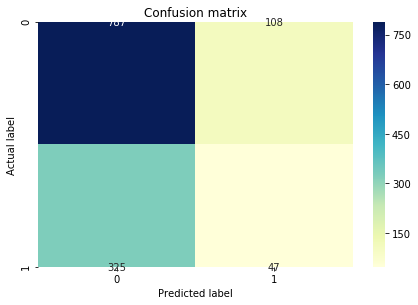

In [322]:
svm_pipeline = Pipeline([
        ('vector', vectorizer),
        ('mname',svm.LinearSVC())
        ])

svm_pipeline.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_svm = svm_pipeline.predict(test_news['clean'])
np.mean(predicted_svm == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_svm)
scoredf.at[0, 'SVM'] = accscore

### CountVectorizer with SGD

accuracy: 68.27150749802684
precision: [0.71122536 0.35      ]
recall: [0.9273743  0.09408602]
fscore: [0.80504365 0.14830508]
support: [895 372]


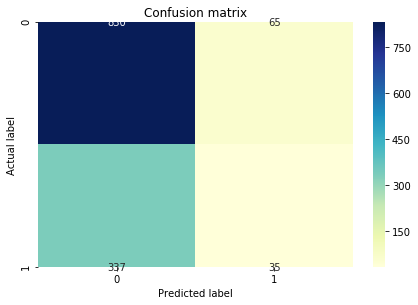

In [323]:
sgd_pipeline = Pipeline([
        ('vector', vectorizer),
        ('mname',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

sgd_pipeline.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_sgd = sgd_pipeline.predict(test_news['clean'])
np.mean(predicted_sgd == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_sgd)
scoredf.at[0, 'SGD'] = accscore


### CountVectorizer with Random Forest

accuracy: 70.32359905288082
precision: [0.70677291 0.33333333]
recall: [0.99106145 0.01075269]
fscore: [0.82511628 0.02083333]
support: [895 372]


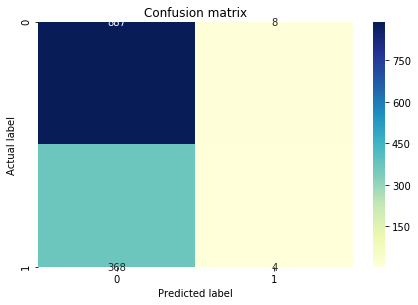

In [324]:
random_forest = Pipeline([
        ('vector', vectorizer),
        ('mname',RandomForestClassifier(n_estimators=100,n_jobs=3))
        ])

random_forest.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_rf = random_forest.predict(test_news['clean'])
np.mean(predicted_rf == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_rf)
scoredf.at[0, 'Random Forest'] = accscore

### CountVectorizer Classification Report

In [325]:
print("\n Classification Report of Naives Bayes regression: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_nb))
print("\n Classification Report of Logistic regression: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_LogR))
print("\n Classification Report of Linear SVM Classifier: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_svm))
print("\n Classification Report of Stochastic Gradient Descent: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_sgd))
print("\n Classification Report of RandomForestClassifier: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_rf))


 Classification Report of Naives Bayes regression: 

              precision    recall  f1-score   support

           0       0.71      0.99      0.83       895
           1       0.44      0.02      0.04       372

    accuracy                           0.70      1267
   macro avg       0.58      0.51      0.43      1267
weighted avg       0.63      0.70      0.60      1267


 Classification Report of Logistic regression: 

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       895
           1       0.40      0.06      0.11       372

    accuracy                           0.70      1267
   macro avg       0.55      0.51      0.46      1267
weighted avg       0.62      0.70      0.61      1267


 Classification Report of Linear SVM Classifier: 

              precision    recall  f1-score   support

           0       0.71      0.88      0.78       895
           1       0.30      0.13      0.18       372

    accuracy              

### TFIDF Vectorizer with Mutinomial Naive Bayes

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfV = TfidfVectorizer(ngram_range = (1,3), sublinear_tf = True)

In [327]:
train_tfidf = tfidfV.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])

test_tfidf = tfidfV.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])

Training dim: (10240, 151469)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test dim: (1267, 24208)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [328]:
tfidf_feature = tfidfV.get_feature_names()
print(tfidf_feature[:25])

['aaa', 'aaa bond', 'aaa bond rate', 'abbott', 'abbott activ', 'abbott activ state', 'abel', 'abel spent', 'abel spent taxpay', 'abercrombi', 'abercrombi made', 'abercrombi made late', 'abil', 'abil stimul', 'abil stimul job', 'abl', 'abl fool', 'abl fool peopl', 'abl keep', 'abl pool', 'abl pool improv', 'abl sharpli', 'abl sharpli curtail', 'aboard', 'aboard florida']


accuracy: 70.63930544593529
precision: [0.70639305 0.        ]
recall: [1. 0.]
fscore: [0.8279371 0.       ]
support: [895 372]


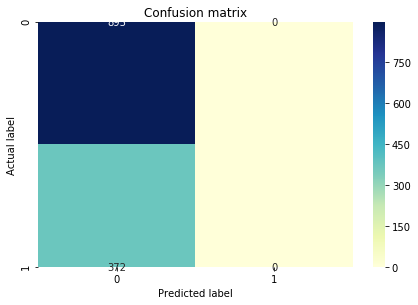

In [329]:
nb_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',MultinomialNB())])

nb_pipeline_ngram.fit(train_news['clean'], train_news['doc2vecsimilarity'])
predicted_nb_ngram = nb_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_nb_ngram == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_nb_ngram)
scoredf.at[1, 'Naive Bayes'] = accscore


### TFIDF Vectorizer with LR

accuracy: 70.48145224940805
precision: [0.70592885 0.        ]
recall: [0.99776536 0.        ]
fscore: [0.82685185 0.        ]
support: [895 372]


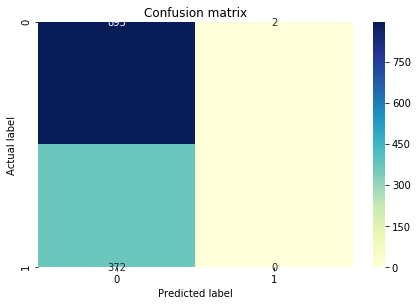

In [330]:
logR_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',LogisticRegression())
        ])
logR_pipeline_ngram.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_LogR_ngram == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_LogR_ngram)
scoredf.at[1, 'Logistic Regression'] = accscore


### TFIDF Vectorizer with Linear SVC

accuracy: 67.16653512233623
precision: [0.71441361 0.35333333]
recall: [0.89162011 0.14247312]
fscore: [0.79324056 0.20306513]
support: [895 372]


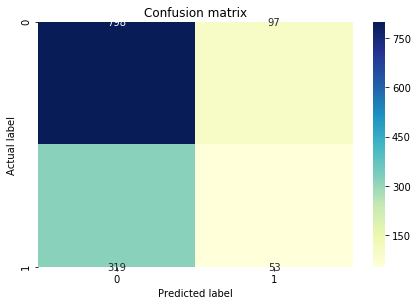

In [331]:
svm_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_svm_ngram = svm_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_svm_ngram == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_svm_ngram)
scoredf.at[1, 'SVM'] = accscore


### TFIDF Vectorizer with SGD

accuracy: 70.63930544593529
precision: [0.70639305 0.        ]
recall: [1. 0.]
fscore: [0.8279371 0.       ]
support: [895 372]


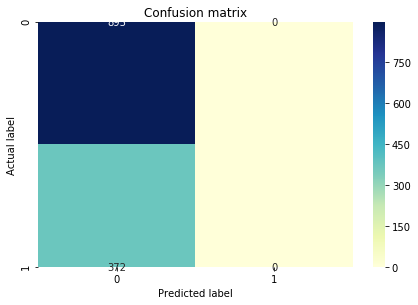

In [332]:
sgd_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

sgd_pipeline_ngram.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_sgd_ngram = sgd_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_sgd_ngram == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_sgd_ngram)
scoredf.at[1, 'SGD'] = accscore


### TFIDF Vectorizer with Random Forest

accuracy: 63.77269139700079
precision: [0.70527307 0.28780488]
recall: [0.83687151 0.15860215]
fscore: [0.76545733 0.20450607]
support: [895 372]


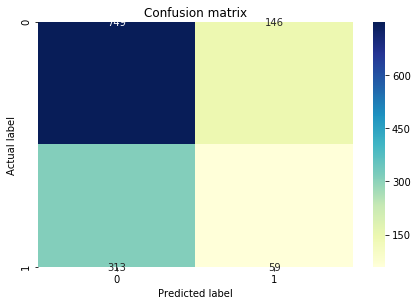

In [333]:
random_forest_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',RandomForestClassifier(n_estimators=100,n_jobs=3))
        ])
    
random_forest_ngram.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_rf_ngram = random_forest_ngram.predict(test_news['clean'])
np.mean(predicted_rf_ngram == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_rf_ngram)
scoredf.at[1, 'Random Forest'] = accscore

### Classification Report for TFIDF approach

In [334]:
print("\n Classification Report of Naives Bayes regression: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_nb))
print("\n Classification Report of Logistic regression: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_LogR))
print("\n Classification Report of Linear SVM Classifier: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_svm))
print("\n Classification Report of Stochastic Gradient Descent: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_sgd))
print("\n Classification Report of RandomForestClassifier: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_rf))


 Classification Report of Naives Bayes regression: 

              precision    recall  f1-score   support

           0       0.71      0.99      0.83       895
           1       0.44      0.02      0.04       372

    accuracy                           0.70      1267
   macro avg       0.58      0.51      0.43      1267
weighted avg       0.63      0.70      0.60      1267


 Classification Report of Logistic regression: 

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       895
           1       0.40      0.06      0.11       372

    accuracy                           0.70      1267
   macro avg       0.55      0.51      0.46      1267
weighted avg       0.62      0.70      0.61      1267


 Classification Report of Linear SVM Classifier: 

              precision    recall  f1-score   support

           0       0.71      0.88      0.78       895
           1       0.30      0.13      0.18       372

    accuracy              

### Doc2Vector Approach

In [0]:
def tag_docs(docs, col):
    tagged = docs.apply(lambda r: TaggedDocument(words=r[col].split(" "), tags=[r['doc2vecsimilarity']]), axis=1)
    return tagged

In [0]:
train_tagged = train_news.apply(lambda r: TaggedDocument(words=r['clean'].split(" "), 
                                                         tags=[r['doc2vecsimilarity']]), axis=1) 

In [337]:
doc2vectraintagvales = train_tagged.values
print("Train Tags: ", doc2vectraintagvales[10])

Train Tags:  TaggedDocument(['first', 'time', 'histori', 'share', 'nation', 'popular', 'vote', 'margin', 'smaller', 'latino', 'vote', 'margin'], [0])


In [0]:
doc2VecModel = Doc2Vec(doc2vectraintagvales, size=1, window=100, iter=20, dm=1)

In [0]:
def train_doc2vec_model(tagged_docs, window, size):
    doc2vectraintagvales = tagged_docs.values
    doc2vec_model = Doc2Vec(doc2vectraintagvales, size=size, window=window, iter=20, dm=1)
    return doc2vec_model

In [0]:
def doc2vec_regressor(doc2vec_model, tagged_docs):
    doc2vectraintagvales = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in doc2vectraintagvales])
    return targets, regressors

In [0]:
train_tagged = tag_docs(train_news, 'clean')
test_tagged = tag_docs(test_news, 'clean')
doc2VecModel = train_doc2vec_model(train_tagged, 100, 1)
y_train, X_train = doc2vec_regressor(doc2VecModel, train_tagged)
y_test, X_test = doc2vec_regressor(doc2VecModel, test_tagged)

In [342]:
print("\n X train dim: ", len(X_train))
print("\n y train dim: ", len(y_train))
print("\n X test dim: ", len(X_test))
print("\n y test dim:", len(y_test))


 X train dim:  10240

 y train dim:  10240

 X test dim:  1267

 y test dim: 1267


### Doc2Vector approach for LR

In [343]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['doc2vecsimilarity']))
print(confusion_matrix(y_test,y_pred))
accscore = accuracy_score(y_test,y_pred) * 100
scoredf.at[2, 'Logistic Regression'] = accscore

Accuracy:  0.7063930544593529
[[895   0]
 [372   0]]


### Doc2Vector approach for Linear SVC

In [344]:
svm_lin = svm.LinearSVC()
svm_lin.fit(X_train, y_train)
y_pred = svm_lin.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['doc2vecsimilarity']))
print(confusion_matrix(y_test,y_pred))
accscore = accuracy_score(y_test,y_pred) * 100
scoredf.at[2, 'SVM'] = accscore

Accuracy:  0.7063930544593529
[[895   0]
 [372   0]]


### Doc2Vector approach for NB

In [345]:
naivebayes = svm.LinearSVC()
naivebayes.fit(X_train, y_train)
y_pred = naivebayes.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['doc2vecsimilarity']))
print(confusion_matrix(y_test,y_pred))
accscore = accuracy_score(y_test,y_pred) * 100
scoredf.at[2, 'Naive Bayes'] = accscore

Accuracy:  0.7063930544593529
[[895   0]
 [372   0]]


### Doc2Vector approach for Random Forest

In [346]:
#random forest
r_forest = RandomForestClassifier(n_estimators=200,n_jobs=3)
r_forest.fit(X_train, y_train)
y_pred = r_forest.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['doc2vecsimilarity']))
confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
accscore = accuracy_score(y_test,y_pred) * 100
scoredf.at[2, 'Random Forest'] = accscore

Accuracy:  0.5580110497237569
[[604 291]
 [269 103]]


### Doc2Vector approach for SGD

In [347]:
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['doc2vecsimilarity']))
confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
accscore = accuracy_score(y_test,y_pred) * 100
scoredf.at[2, 'SGD'] = accscore

Accuracy:  0.7063930544593529
[[895   0]
 [372   0]]


### Comparision of the Classfication Approaches for News Coverage Feature.
 Doc2Vector Model has mostly high accuracy scores compared to the CountVectorizer and TFIDF. The Accuracy score is higher around 69% for most of the algorithms, Multinomial NB with TFIDF has the hightest accuracy score overall. So either TFIDF or Doc2Vector Approach could be considered for the feature evaluation

In [348]:
scoredf.head()

,Classification Model,Naive Bayes,SVM,SGD,Logistic Regression,Random Forest
0,CountVectorizer,70.4815,65.8248,68.2715,69.6922,70.3236
1,TFIDF,70.6393,67.1665,70.6393,70.4815,63.7727
2,Doc2Vector,70.6393,70.6393,70.6393,70.6393,55.8011


### Implementing a class for NewsCoverage Feature to predict the model using TFIDF Vectorizer and Multinomial Naive Bayes Algorithm

In [0]:
class NewsCoverage():

    def __init__(self):        

        dataTrain = pd.read_csv('/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/train_processed_d2v.csv', sep=',')
        dataTest = pd.read_csv('/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/test_processed_d2v.csv', sep=',')

        tfidfV = TfidfVectorizer(ngram_range = (1,3), sublinear_tf = True)

        self.nb_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',MultinomialNB())])

        self.nb_pipeline_ngram.fit(dataTrain['headline_text'], dataTrain['doc2vecsimilarity'])
        predicted_nb_ngram = self.nb_pipeline_ngram.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['doc2vecsimilarity'], predicted_nb_ngram)
        print("News Coverage Model Trained - accuracy:   %0.6f" % score)

    def predict(self, text):
        predicted = self.nb_pipeline_ngram.predict([text])
        predicedProb = self.nb_pipeline_ngram.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)


### Test the News Coverage Feature Model for the True, False value using TFIDF Vectorizer and MNB Algorithm

In [350]:
nc = NewsCoverage()
print(nc.predict("Says GOP primary opponents Glenn Grothman and Joe Leibham cast a compromise vote that cost $788 million in higher electricity costs."))
print(nc.predict("The economic turnaround started at the end of my term."))


News Coverage Model Trained - accuracy:   0.706393
(False, 0.46209878559435646)
(False, 0.3658186994663088)


### Sensational Feature Integration


In [351]:
corpus = []
for i in train_news['clean']:
    corpus.append(i)

sensational_corpus=[]
sensational_words = pd.read_csv('/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/sensationalism/sensational_words_dict.csv', sep="\t+", header=None, usecols=[0] )
print(len(sensational_words))
sensational_dictionary = ' '.join(sensational_words[0].astype(str))
sensational_corpus.append(sensational_dictionary)

1443


In [352]:
from sklearn.preprocessing import scale
sentic_net = pd.read_csv('/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/sensationalism/senticnet5.txt', sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])
sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
sentic_net = sentic_net.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sentic_net))
print(sentic_net.head(10))

Senticnet Vocab Size:  39891
         Token  Polarity  Intensity
0      abandon  negative      -0.84
1    abandoned  negative      -0.85
2  abandonment  negative      -0.82
3        abase  negative      -0.90
4    abasement  negative      -0.90
5        abash  negative      -0.77
6      abashed  negative      -0.92
7    abashment  negative      -0.76
8       abasia  negative      -0.67
9        abate  negative      -0.86


In [353]:
senti_pos = sentic_net.loc[sentic_net.Polarity == "positive"]
senti_pos = senti_pos.loc[senti_pos.Intensity > 0.90]
dictionary = ' '.join(senti_pos.Token.astype(str))
sensational_corpus.append(dictionary)
print(len(senti_pos))

2040


### TF-IDF and Cosine Similarity

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVec = TfidfVectorizer(max_features=1000)

tfidf_corpus = tfidfVec.fit_transform(corpus)
tf_idf_senti = tfidfVec.fit_transform(sensational_corpus)
words = tfidfVec.get_feature_names()

In [355]:
tfidf_corpus.toarray()

array([[0.       , 0.       , 0.3265899, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [356]:
tf_idf_senti.toarray()

array([[0.02934579, 0.05869158, 0.05869158, ..., 0.        , 0.        ,
        0.08803737],
       [0.        , 0.        , 0.        , ..., 0.19269152, 0.06423051,
        0.        ]])

In [357]:
train_tfidf = tfidfVec.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])


test_tfidf = tfidfVec.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])


valid_tfidf = tfidfVec.fit_transform(valid_news['clean'])
print('Valid dim:', valid_tfidf.shape)
print(valid_tfidf.A[:10])

Training dim: (10240, 1000)
[[0.        0.        0.3265899 ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]
Test dim: (1267, 1000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Valid dim: (1284, 1000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
# from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
similarity_score = []
for i in range(len(train_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))

In [359]:
train_news['sensational_score'] = similarity_score
train_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed,doc2vector_values,topdoc0,doc2vec0,doc2vec1,doc2vec2,doc2vectop1,doc2vectop25,doc2vectop50,doc2vectop75,doc2veclast,midabovezero,score0minus1,score1minus2,score0minus2,score0minustop1,doc2vecsimilarity,encoded_label,sensational_score
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...,"[say, anni, list, polit, group, support, third...","[(0, 0.100*""say"" + 0.100*""list"" + 0.100*""third...","[say , list , third , support , abort]",say list third support abort,"[(52370, 0.4188210368156433), (45657, 0.397479...",52370,0.418821,0.397480,0.391816,0.230080,0.068292,0.000566,-0.067423,-0.457037,1,0.021342,0.005664,0.027005,0.188741,0,0,0.078289
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...,"[declin, coal, start, start, natur, gas, took,...","[(0, 0.167*""start"" + 0.083*""georg"" + 0.083*""ga...","[start , georg , gas , presid , natur]",start georg gas presid natur,"[(45597, 0.3916231393814087), (70428, 0.377940...",45597,0.391623,0.377941,0.376659,0.227463,0.065558,-0.002322,-0.070014,-0.470872,0,0.013682,0.001282,0.014964,0.164160,0,1,0.050313
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,"[hillari, clinton, agre, john, mccain, vote, g...","[(0, 0.083*""hillari"" + 0.083*""georg"" + 0.083*""...","[hillari , georg , mccain , john , iran]",hillari georg mccain john iran,"[(72028, 0.41241946816444397), (69129, 0.40384...",72028,0.412419,0.403845,0.390639,0.232733,0.067107,-0.000325,-0.067631,-0.399030,0,0.008574,0.013207,0.021781,0.179687,0,1,0.095473
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,"[health, care, reform, legisl, like, mandat, f...","[(0, 0.100*""mandat"" + 0.100*""legisl"" + 0.100*""...","[mandat , legisl , sex , reform , care]",mandat legisl sex reform care,"[(23734, 0.4179561138153076), (13708, 0.388687...",23734,0.417956,0.388687,0.385093,0.231227,0.067698,-0.000322,-0.068272,-0.408390,0,0.029269,0.003594,0.032863,0.186729,0,0,0.018300
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[econom, turnaround, start, end, term]","[(0, 0.200*""econom"" + 0.200*""end"" + 0.200*""sta...","[econom , end , start , term , turnaround]",econom end start term turnaround,"[(44344, 0.4264419674873352), (61061, 0.407299...",44344,0.426442,0.407299,0.406985,0.230309,0.068166,0.000543,-0.067348,-0.425228,1,0.019143,0.000315,0.019457,0.196133,1,1,0.058305


In [360]:
corpus = []
for i in test_news['clean']:
    corpus.append(i)
# corpus

tfidf_corpus = tfidfVec.fit_transform(corpus)

similarity_score = []
for i in range(len(test_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))
    
test_news['sensational_score'] = similarity_score
test_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed,doc2vector_values,topdoc0,doc2vec0,doc2vec1,doc2vec2,doc2vectop1,doc2vectop25,doc2vectop50,doc2vectop75,doc2veclast,midabovezero,score0minus1,score1minus2,score0minus2,score0minustop1,doc2vecsimilarity,encoded_label,sensational_score
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall mexico border take liter year,"[build, wall, mexico, border, take, liter, year]","[(0, 0.143*""take"" + 0.143*""mexico"" + 0.143*""wa...","[take , mexico , wall , border , liter]",take mexico wall border liter,"[(97139, 0.41699445247650146), (77603, 0.40401...",97139,0.416994,0.404015,0.392761,0.231940,0.068261,0.000473,-0.067550,-0.415066,1,0.012979,0.011254,0.024233,0.185055,0,1,0.105547
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[wisconsin, pace, doubl, number, layoff, year]","[(0, 0.167*""doubl"" + 0.167*""layoff"" + 0.167*""n...","[doubl , layoff , number , pace , wisconsin]",doubl layoff number pace wisconsin,"[(67909, 0.4299817979335785), (85721, 0.390455...",67909,0.429982,0.390456,0.365837,0.231698,0.066995,-0.001005,-0.068888,-0.414437,0,0.039526,0.024618,0.064144,0.198284,0,0,0.032927
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[say, john, mccain, done, noth, help, vet]","[(0, 0.143*""noth"" + 0.143*""mccain"" + 0.143*""sa...","[noth , mccain , say , done , john]",noth mccain say done john,"[(62166, 0.4074826240539551), (95674, 0.402979...",62166,0.407483,0.402979,0.399473,0.231466,0.068390,0.000307,-0.066897,-0.411483,1,0.004503,0.003506,0.008010,0.176017,0,0,0.027720
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...,"[suzann, bonamici, support, plan, cut, choic, ...","[(0, 0.111*""plan"" + 0.111*""medicar"" + 0.111*""s...","[plan , medicar , support , senior , advantag]",plan medicar support senior advantag,"[(6111, 0.4579394459724426), (6307, 0.42464876...",6111,0.457939,0.424649,0.399980,0.230706,0.066614,-0.000843,-0.068622,-0.422446,0,0.033291,0.024669,0.057960,0.227233,1,1,0.019372
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether center crimin scheme violat...,"[ask, report, whether, center, crimin, scheme,...","[(0, 0.071*""violat"" + 0.071*""whether"" + 0.071*...","[violat , whether , scheme , walker , nod]",violat whether scheme walker nod,"[(21422, 0.4590405821800232), (58510, 0.425023...",21422,0.459041,0.425023,0.406902,0.232205,0.068639,0.000963,-0.067048,-0.432490,1,0.034017,0.018121,0.052139,0.226835,1,0,0.061204


### Labelling the sensational feature

In [361]:
sensational = [] 
sensationalmidvalue = train_news.describe()['sensational_score']['50%']
for row in train_news['sensational_score']:
    if row > sensationalmidvalue:
        sensational.append(1)
    else:
        sensational.append(0) 

train_news['sensational_label'] = sensational
train_news.head(5)


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed,doc2vector_values,topdoc0,doc2vec0,doc2vec1,doc2vec2,doc2vectop1,doc2vectop25,doc2vectop50,doc2vectop75,doc2veclast,midabovezero,score0minus1,score1minus2,score0minus2,score0minustop1,doc2vecsimilarity,encoded_label,sensational_score,sensational_label
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...,"[say, anni, list, polit, group, support, third...","[(0, 0.100*""say"" + 0.100*""list"" + 0.100*""third...","[say , list , third , support , abort]",say list third support abort,"[(52370, 0.4188210368156433), (45657, 0.397479...",52370,0.418821,0.397480,0.391816,0.230080,0.068292,0.000566,-0.067423,-0.457037,1,0.021342,0.005664,0.027005,0.188741,0,0,0.078289,1
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...,"[declin, coal, start, start, natur, gas, took,...","[(0, 0.167*""start"" + 0.083*""georg"" + 0.083*""ga...","[start , georg , gas , presid , natur]",start georg gas presid natur,"[(45597, 0.3916231393814087), (70428, 0.377940...",45597,0.391623,0.377941,0.376659,0.227463,0.065558,-0.002322,-0.070014,-0.470872,0,0.013682,0.001282,0.014964,0.164160,0,1,0.050313,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,"[hillari, clinton, agre, john, mccain, vote, g...","[(0, 0.083*""hillari"" + 0.083*""georg"" + 0.083*""...","[hillari , georg , mccain , john , iran]",hillari georg mccain john iran,"[(72028, 0.41241946816444397), (69129, 0.40384...",72028,0.412419,0.403845,0.390639,0.232733,0.067107,-0.000325,-0.067631,-0.399030,0,0.008574,0.013207,0.021781,0.179687,0,1,0.095473,1
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,"[health, care, reform, legisl, like, mandat, f...","[(0, 0.100*""mandat"" + 0.100*""legisl"" + 0.100*""...","[mandat , legisl , sex , reform , care]",mandat legisl sex reform care,"[(23734, 0.4179561138153076), (13708, 0.388687...",23734,0.417956,0.388687,0.385093,0.231227,0.067698,-0.000322,-0.068272,-0.408390,0,0.029269,0.003594,0.032863,0.186729,0,0,0.018300,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[econom, turnaround, start, end, term]","[(0, 0.200*""econom"" + 0.200*""end"" + 0.200*""sta...","[econom , end , start , term , turnaround]",econom end start term turnaround,"[(44344, 0.4264419674873352), (61061, 0.407299...",44344,0.426442,0.407299,0.406985,0.230309,0.068166,0.000543,-0.067348,-0.425228,1,0.019143,0.000315,0.019457,0.196133,1,1,0.058305,1


In [362]:
sensational = [] 
sensationalmidvalue = test_news.describe()['sensational_score']['50%']
for row in test_news['sensational_score']:
    if row > sensationalmidvalue:
        sensational.append(1)
    else:
        sensational.append(0) 

test_news['sensational_label'] = sensational
test_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,cleanlist,topics,topicsparsedlist,topicsparsed,doc2vector_values,topdoc0,doc2vec0,doc2vec1,doc2vec2,doc2vectop1,doc2vectop25,doc2vectop50,doc2vectop75,doc2veclast,midabovezero,score0minus1,score1minus2,score0minus2,score0minustop1,doc2vecsimilarity,encoded_label,sensational_score,sensational_label
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall mexico border take liter year,"[build, wall, mexico, border, take, liter, year]","[(0, 0.143*""take"" + 0.143*""mexico"" + 0.143*""wa...","[take , mexico , wall , border , liter]",take mexico wall border liter,"[(97139, 0.41699445247650146), (77603, 0.40401...",97139,0.416994,0.404015,0.392761,0.231940,0.068261,0.000473,-0.067550,-0.415066,1,0.012979,0.011254,0.024233,0.185055,0,1,0.105547,1
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[wisconsin, pace, doubl, number, layoff, year]","[(0, 0.167*""doubl"" + 0.167*""layoff"" + 0.167*""n...","[doubl , layoff , number , pace , wisconsin]",doubl layoff number pace wisconsin,"[(67909, 0.4299817979335785), (85721, 0.390455...",67909,0.429982,0.390456,0.365837,0.231698,0.066995,-0.001005,-0.068888,-0.414437,0,0.039526,0.024618,0.064144,0.198284,0,0,0.032927,0
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[say, john, mccain, done, noth, help, vet]","[(0, 0.143*""noth"" + 0.143*""mccain"" + 0.143*""sa...","[noth , mccain , say , done , john]",noth mccain say done john,"[(62166, 0.4074826240539551), (95674, 0.402979...",62166,0.407483,0.402979,0.399473,0.231466,0.068390,0.000307,-0.066897,-0.411483,1,0.004503,0.003506,0.008010,0.176017,0,0,0.027720,0
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...,"[suzann, bonamici, support, plan, cut, choic, ...","[(0, 0.111*""plan"" + 0.111*""medicar"" + 0.111*""s...","[plan , medicar , support , senior , advantag]",plan medicar support senior advantag,"[(6111, 0.4579394459724426), (6307, 0.42464876...",6111,0.457939,0.424649,0.399980,0.230706,0.066614,-0.000843,-0.068622,-0.422446,0,0.033291,0.024669,0.057960,0.227233,1,1,0.019372,0
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether center crimin scheme violat...,"[ask, report, whether, center, crimin, scheme,...","[(0, 0.071*""violat"" + 0.071*""whether"" + 0.071*...","[violat , whether , scheme , walker , nod]",violat whether scheme walker nod,"[(21422, 0.4590405821800232), (58510, 0.425023...",21422,0.459041,0.425023,0.406902,0.232205,0.068639,0.000963,-0.067048,-0.432490,1,0.034017,0.018121,0.052139,0.226835,1,0,0.061204,1


In [0]:
def create_distribution(dataFile):
    return sns.countplot(x='sensational_label', data=dataFile, palette="Set3")

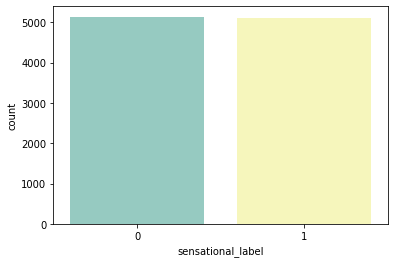

In [364]:
create_distribution(train_news)

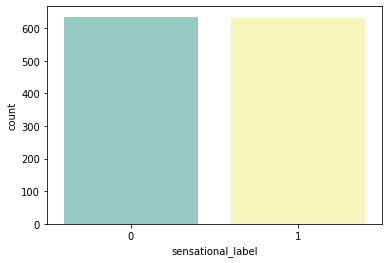

In [365]:
create_distribution(test_news)


In [0]:
train_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/train_processed_sensational.csv", sep=',')
test_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/test_processed_sensational.csv", sep=',')
valid_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/valid_processed_sensational.csv", sep=',')

In [0]:
class SensationalPrediction():

    def __init__(self):        

        dataTrain = pd.read_csv('/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/train_processed_sensational.csv', sep=',')
        dataTest = pd.read_csv('/content/drive/My Drive/MLFall2019/[project-team-name]/Spartans-AlternusVera/Sudha/input_data/test_processed_sensational.csv', sep=',')

        tfidfV = TfidfVectorizer(ngram_range = (1,3), sublinear_tf = True)

        self.nb_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',MultinomialNB())])

        self.nb_pipeline_ngram.fit(dataTrain['headline_text'], dataTrain['sensational_label'])
        predicted_nb_ngram = self.nb_pipeline_ngram.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['sensational_label'], predicted_nb_ngram)
        print("Sensational Feature Prediction - accuracy:   %0.6f" % score)

    def predict(self, text):
        predicted = self.nb_pipeline_ngram.predict([text])
        predicedProb = self.nb_pipeline_ngram.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)


### Test the Sensational Feature Model for the True, False value using TFIDF MNB

In [368]:
sp = SensationalPrediction()
print(sp.predict("Says GOP primary opponents Glenn Grothman and Joe Leibham cast a compromise vote that cost $788 million in higher electricity costs."))
print(sp.predict("Most of the (Affordable Care Act) has already in some sense been waived or otherwise suspended."))

Sensational Feature Prediction - accuracy:   0.590371
(False, 0.27568591036772055)
(False, 0.1800111791119693)


### Word2Vector, TSNE visualization

In [0]:
from gensim.models import word2vec
num_features = 400
min_count = 40
num_processor = 4
context = 10
downsampling = 0.001

In [0]:
train_words = []
test_words = [] 

# Append all the cleaned words
for news in train_news['clean']:
    train_words.append(news.split())
# print(train_words)   

# Append all the cleaned words
for news in test_news['clean']:
    test_words.append(news.split())
# print(test_words)

In [371]:
'''

train_w2v = word2vec.Word2Vec(train_words, workers = num_processor, 
                         size = num_features, min_count = min_count,
                         window = context, sample = downsampling)
train_w2v.init_sims(replace = True)
train_w2v.most_similar("trump")
'''

'\n\ntrain_w2v = word2vec.Word2Vec(train_words, workers = num_processor, \n                         size = num_features, min_count = min_count,\n                         window = context, sample = downsampling)\ntrain_w2v.init_sims(replace = True)\ntrain_w2v.most_similar("trump")\n'

In [372]:
# Import libraries
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore",category=RuntimeWarning)

# List of vocabulary.

vocab = list(train_w2v.wv.vocab)

# index vector values by corresponding vocab list

X = train_w2v[vocab]

print("Total Number of Vocab:", len(X))
print()
print(X[0][:10])

# Visualize only 100 words.

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X[:100,:])

Total Number of Vocab: 81

[ 0.04008487  0.05272694 -0.09421504 -0.0144974   0.09613208 -0.0025202
  0.00209749 -0.01900606  0.00844796  0.09784674]


In [373]:
tsnedf = pd.DataFrame(X_tsne, index = vocab[:100], columns = ['X','Y'])
tsnedf.head()

,X,Y
say,-24.564598,-9.575382
support,244.179886,-40.572861
abort,86.902092,110.159042
presid,19.174427,76.160301
hillari,122.791985,-116.379570


### TSNE plot for the X train_news words

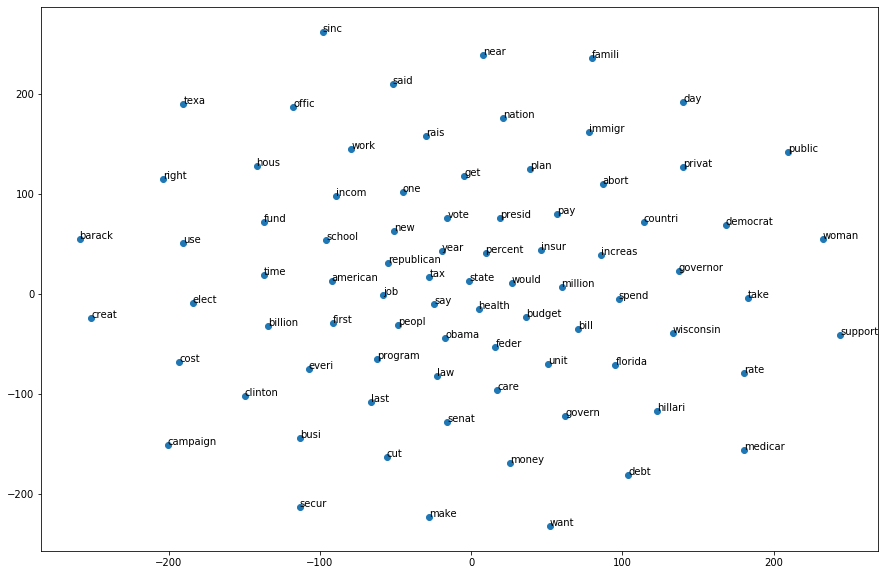

In [374]:
fig = plt.figure()
fig.set_size_inches(15,10)

ax = fig.add_subplot(1,1,1)
ax.scatter(tsnedf['X'], tsnedf['Y'])

# Put the label on each point.
for word, pos in tsnedf.iterrows():
    ax.annotate(word, pos, fontsize = 10)
plt.show()

In [0]:
from sklearn.manifold import TSNE
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

### TSNE plot for the complete train_news word2vector model

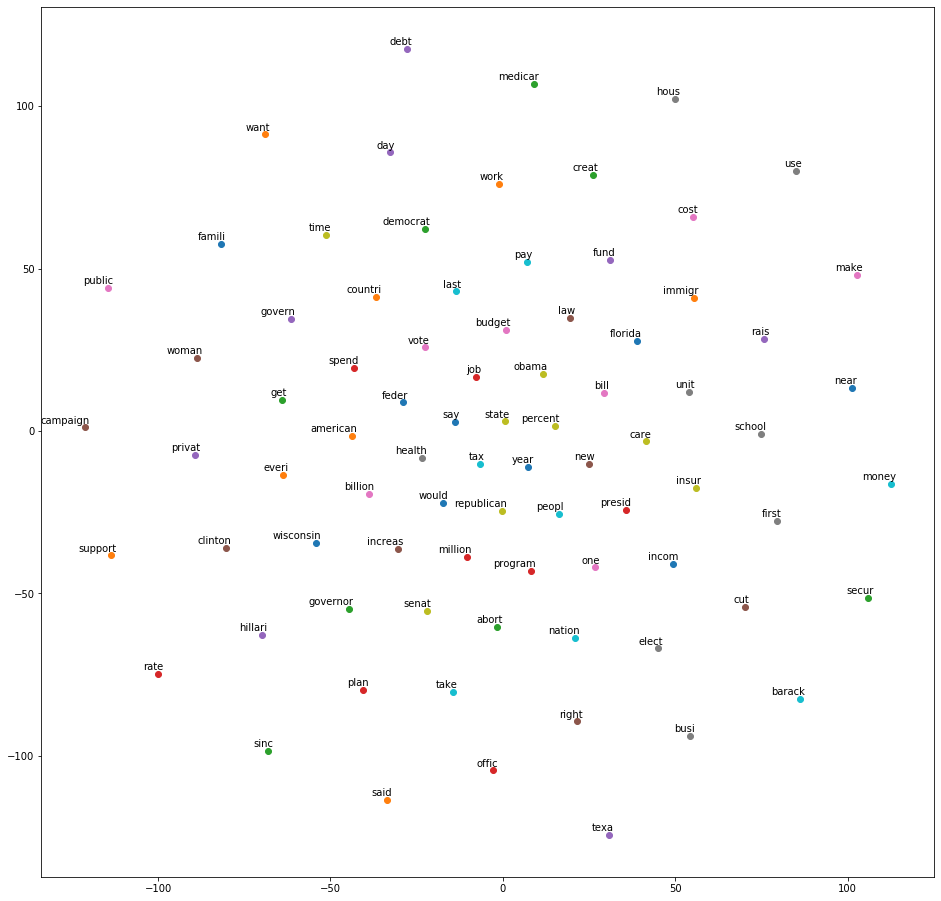

In [376]:
tsne_plot(train_w2v)